In [1]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# Cargar las stopwords en inglés
stop_words = set(stopwords.words('english'))


In [3]:

# Cargar el dataset
df_amazon = pd.read_csv("amazon.csv")

In [4]:
# Seleccionar solo las columnas necesarias
df_amazon = df_amazon[['review_content', 'rating']].copy()

# Convertir la columna de rating a numérico
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')

# Eliminar valores nulos
df_amazon = df_amazon.dropna(subset=['review_content', 'rating'])




In [5]:
# Convertir rating en etiquetas de sentimiento
df_amazon['sentiment'] = df_amazon['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

In [6]:
# Función de limpieza de texto
def clean_text(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y puntuación
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenizar palabras
    words = text.split()
    # Eliminar stopwords
    words = [word for word in words if word not in stop_words]
    # Unir palabras limpias en una sola cadena
    return ' '.join(words)


In [7]:
# Aplicar la limpieza de texto a las reseñas
df_amazon['clean_review'] = df_amazon['review_content'].apply(clean_text)


In [9]:
# Mostrar las primeras filas del dataset limpio
print(df_amazon[['review_content', 'clean_review', 'sentiment']].head())

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        clean_review sentiment  
0  looks durable charging fine toono complainscha...  positive  
1  ordered cable connect phone android auto car c...  positive  
2  quite durable sturdyhttpsmmediaamazoncomimages...  negative  
3  good productlong wirecharges goodnicei bought ...  positive  
4  bought instead original apple work rs fast app...  positive  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Usamos las 5000 palabras más relevantes



In [12]:
# Aplicar TF-IDF a las reseñas limpias
tfidf_matrix = tfidf_vectorizer.fit_transform(df_amazon['clean_review'])



In [13]:
# Convertir la matriz a DataFrame para visualizar mejor
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [14]:
tfidf_df.to_csv("amazon_tfidf.csv", index=False)

In [15]:
# Mostrar las primeras filas del DataFrame TF-IDF
print(tfidf_df.head())


    aa  aaa   ab  ability  able  absent  absolute  absolutely   ac  accept  \
0  0.0  0.0  0.0      0.0   0.0     0.0       0.0         0.0  0.0     0.0   
1  0.0  0.0  0.0      0.0   0.0     0.0       0.0         0.0  0.0     0.0   
2  0.0  0.0  0.0      0.0   0.0     0.0       0.0         0.0  0.0     0.0   
3  0.0  0.0  0.0      0.0   0.0     0.0       0.0         0.0  0.0     0.0   
4  0.0  0.0  0.0      0.0   0.0     0.0       0.0         0.0  0.0     0.0   

   ...  yrs   yt  zebronics  zero  zip  zone  zones  zoom  zoomand  zoul  
0  ...  0.0  0.0        0.0   0.0  0.0   0.0    0.0   0.0      0.0   0.0  
1  ...  0.0  0.0        0.0   0.0  0.0   0.0    0.0   0.0      0.0   0.0  
2  ...  0.0  0.0        0.0   0.0  0.0   0.0    0.0   0.0      0.0   0.0  
3  ...  0.0  0.0        0.0   0.0  0.0   0.0    0.0   0.0      0.0   0.0  
4  ...  0.0  0.0        0.0   0.0  0.0   0.0    0.0   0.0      0.0   0.0  

[5 rows x 5000 columns]


In [16]:
# Definir variables de entrada (X) y salida (y)
X = tfidf_matrix  # Matriz TF-IDF
y = df_amazon['sentiment'].map({'positive': 1, 'negative': 0})  # Convertir etiquetas a 1 y 0


In [17]:
# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [20]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.4f}')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Accuracy del modelo: 0.7645
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.09      0.17        74
           1       0.76      0.99      0.86       219

    accuracy                           0.76       293
   macro avg       0.77      0.54      0.52       293
weighted avg       0.77      0.76      0.69       293



In [21]:
df_amazon

,review_content,rating,sentiment,clean_review
0,Looks durable Charging is fine tooNo complains...,4.2,positive,looks durable charging fine toono complainscha...
1,I ordered this cable to connect my phone to An...,4.0,positive,ordered cable connect phone android auto car c...
2,"Not quite durable and sturdy,https://m.media-a...",3.9,negative,quite durable sturdyhttpsmmediaamazoncomimages...
3,"Good product,long wire,Charges good,Nice,I bou...",4.2,positive,good productlong wirecharges goodnicei bought ...
4,"Bought this instead of original apple, does th...",4.2,positive,bought instead original apple work rs fast app...
...,...,...,...,...
1460,"I received product without spanner,Excellent p...",4.0,positive,received product without spannerexcellent prod...
1461,"ok,got everything as mentioned but the measuri...",4.1,positive,okgot everything mentioned measuring cup broke...
1462,"plastic but cool body ,u have to find sturdy s...",3.6,negative,plastic cool body u find sturdy surface put ve...
1463,I have installed this in my kitchen working fi...,4.0,positive,installed kitchen working fine fan speed slow ...


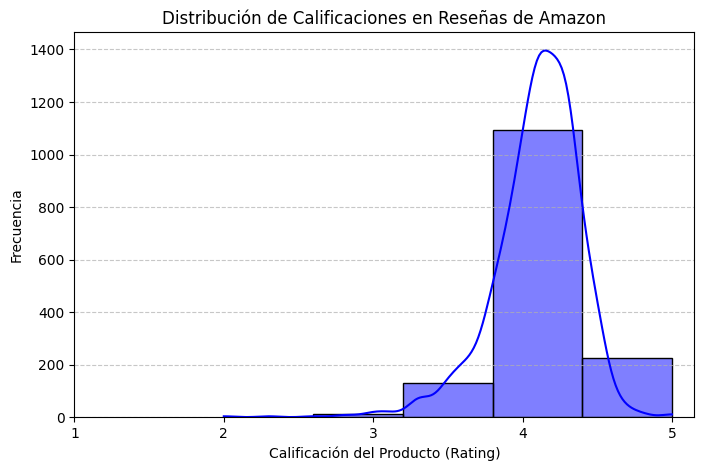

In [32]:
# 1. Fixing the Distribution of Ratings Plot
plt.figure(figsize=(8, 5))
sns.histplot(df_amazon['rating'].dropna(), bins=5, kde=True, color="blue")
plt.xlabel("Calificación del Producto (Rating)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones en Reseñas de Amazon")
plt.xticks(range(1, 6))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("distribucion_calificaciones.png", dpi=300)
plt.show()

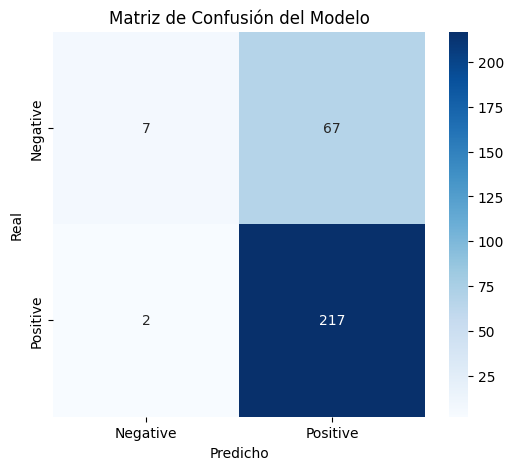

In [33]:
# 2. Fixing Confusion Matrix Plot
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)  # Predictions from the model
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Modelo")
# Guardar la gráfica
plt.savefig("matriz_confusion.png", dpi=300)
plt.show()

In [24]:
# Obtener las probabilidades de predicción del modelo
y_prob = model.predict_proba(X_test)[:, 1] 

In [25]:
# Crear un DataFrame para comparar la predicción con la calificación real
comparison_df = pd.DataFrame({
    'Actual Rating': y_test.map({1: 'positive', 0: 'negative'}),  # Convertir valores binarios a etiquetas
    'Predicted Sentiment': ['positive' if prob >= 0.5 else 'negative' for prob in y_prob],
    'Predicted Probability': y_prob
})



In [26]:
# Guardar el resultado en un archivo CSV
comparison_df.to_csv("amazon_comparison.csv", index=False)



In [27]:
# Mostrar una muestra de la comparación
print(comparison_df.head())

     Actual Rating Predicted Sentiment  Predicted Probability
1297      positive            positive               0.759262
175       negative            positive               0.813446
275       negative            positive               0.542898
548       positive            positive               0.846811
1000      negative            positive               0.902494
